In [1]:
suppressMessages({library(Seurat)
library(ggplot2)
library(ggpubr)
library(glue)
library(dplyr)
library(cowplot)
library(org.Hs.eg.db)
library(org.Mm.eg.db)
library(biomaRt)
library(RColorBrewer)
library(msigdbr)
library(ggrepel)
library(dittoSeq)
library(repr)})

In [2]:
obj <- readRDS('/data/yuchen_data/Stereo_seq/All_Figures/Figure5/1.data/Final.naiveB.v2.rds')

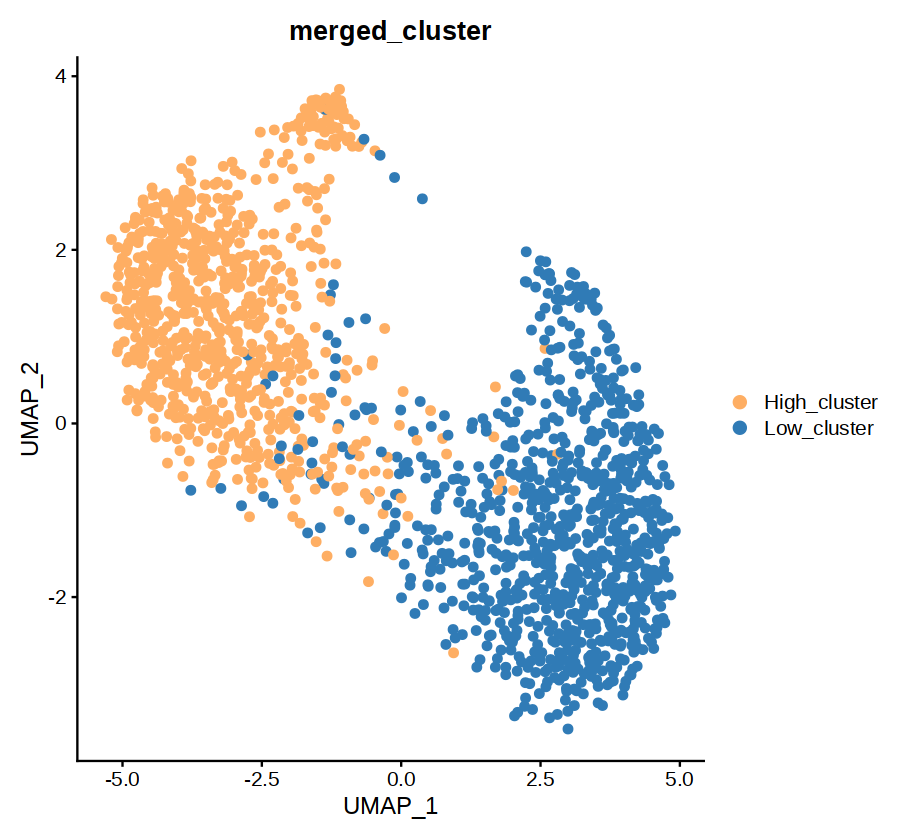

In [4]:
tmp_colors <- c('#FEAE63', '#307BB6')
options(repr.plot.width=7.5, repr.plot.height=7)
DimPlot(obj, group.by='merged_cluster', pt.size=2, cols=tmp_colors)

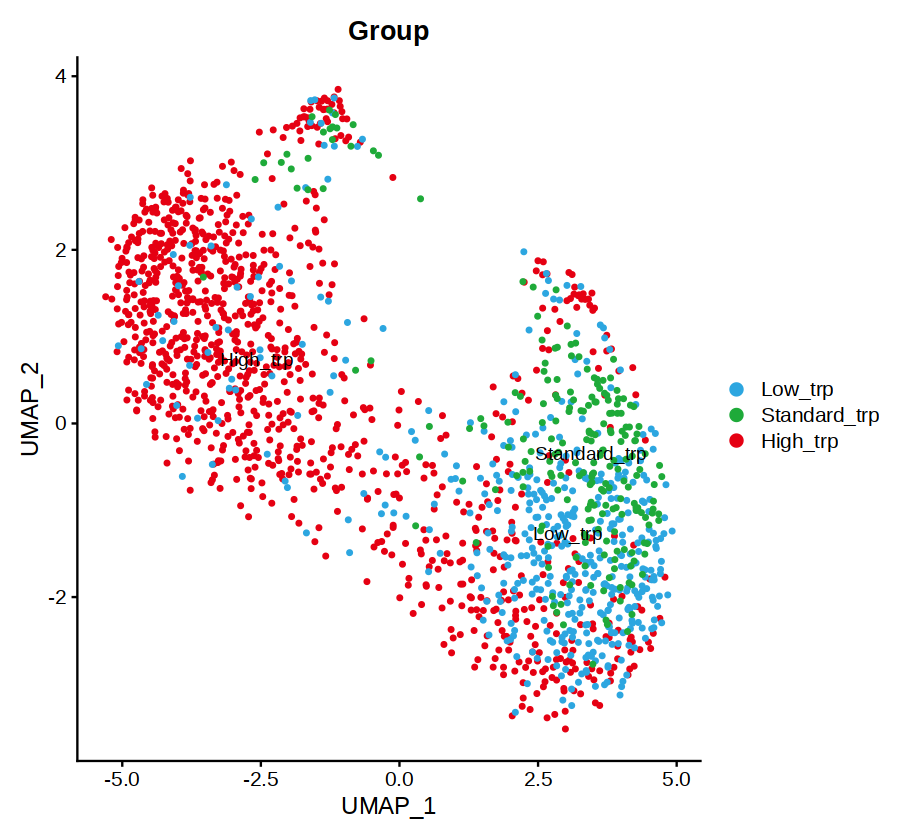

In [5]:
plot_colors <- c("#2CA6E0", "#1EAA39", "#E50012")
DimPlot(obj, label=T, group.by='Group', cols=plot_colors)

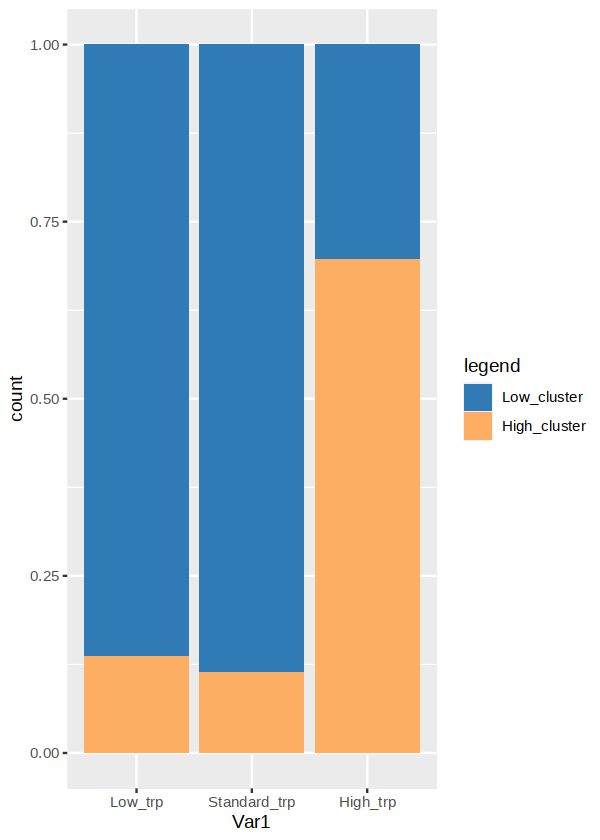

In [6]:
tmp_colors <- c('#FEAE63', '#307BB6')
pt <- table(obj$Group, obj$merged_cluster)
pt = pt / rowSums(pt)
pt <- as.data.frame(pt)
pt$Var2 = factor(pt$Var2, levels=c('Low_cluster', 'High_cluster'))
options(repr.plot.width=5, repr.plot.height=7)
ggplot(pt, mapping = aes(x = Var1, weight = Freq, fill =  Var2)) + 
        geom_bar(position= "stack") + scale_fill_manual("legend", values = c('Low_cluster' = tmp_colors[2], 'High_cluster' = tmp_colors[1]))

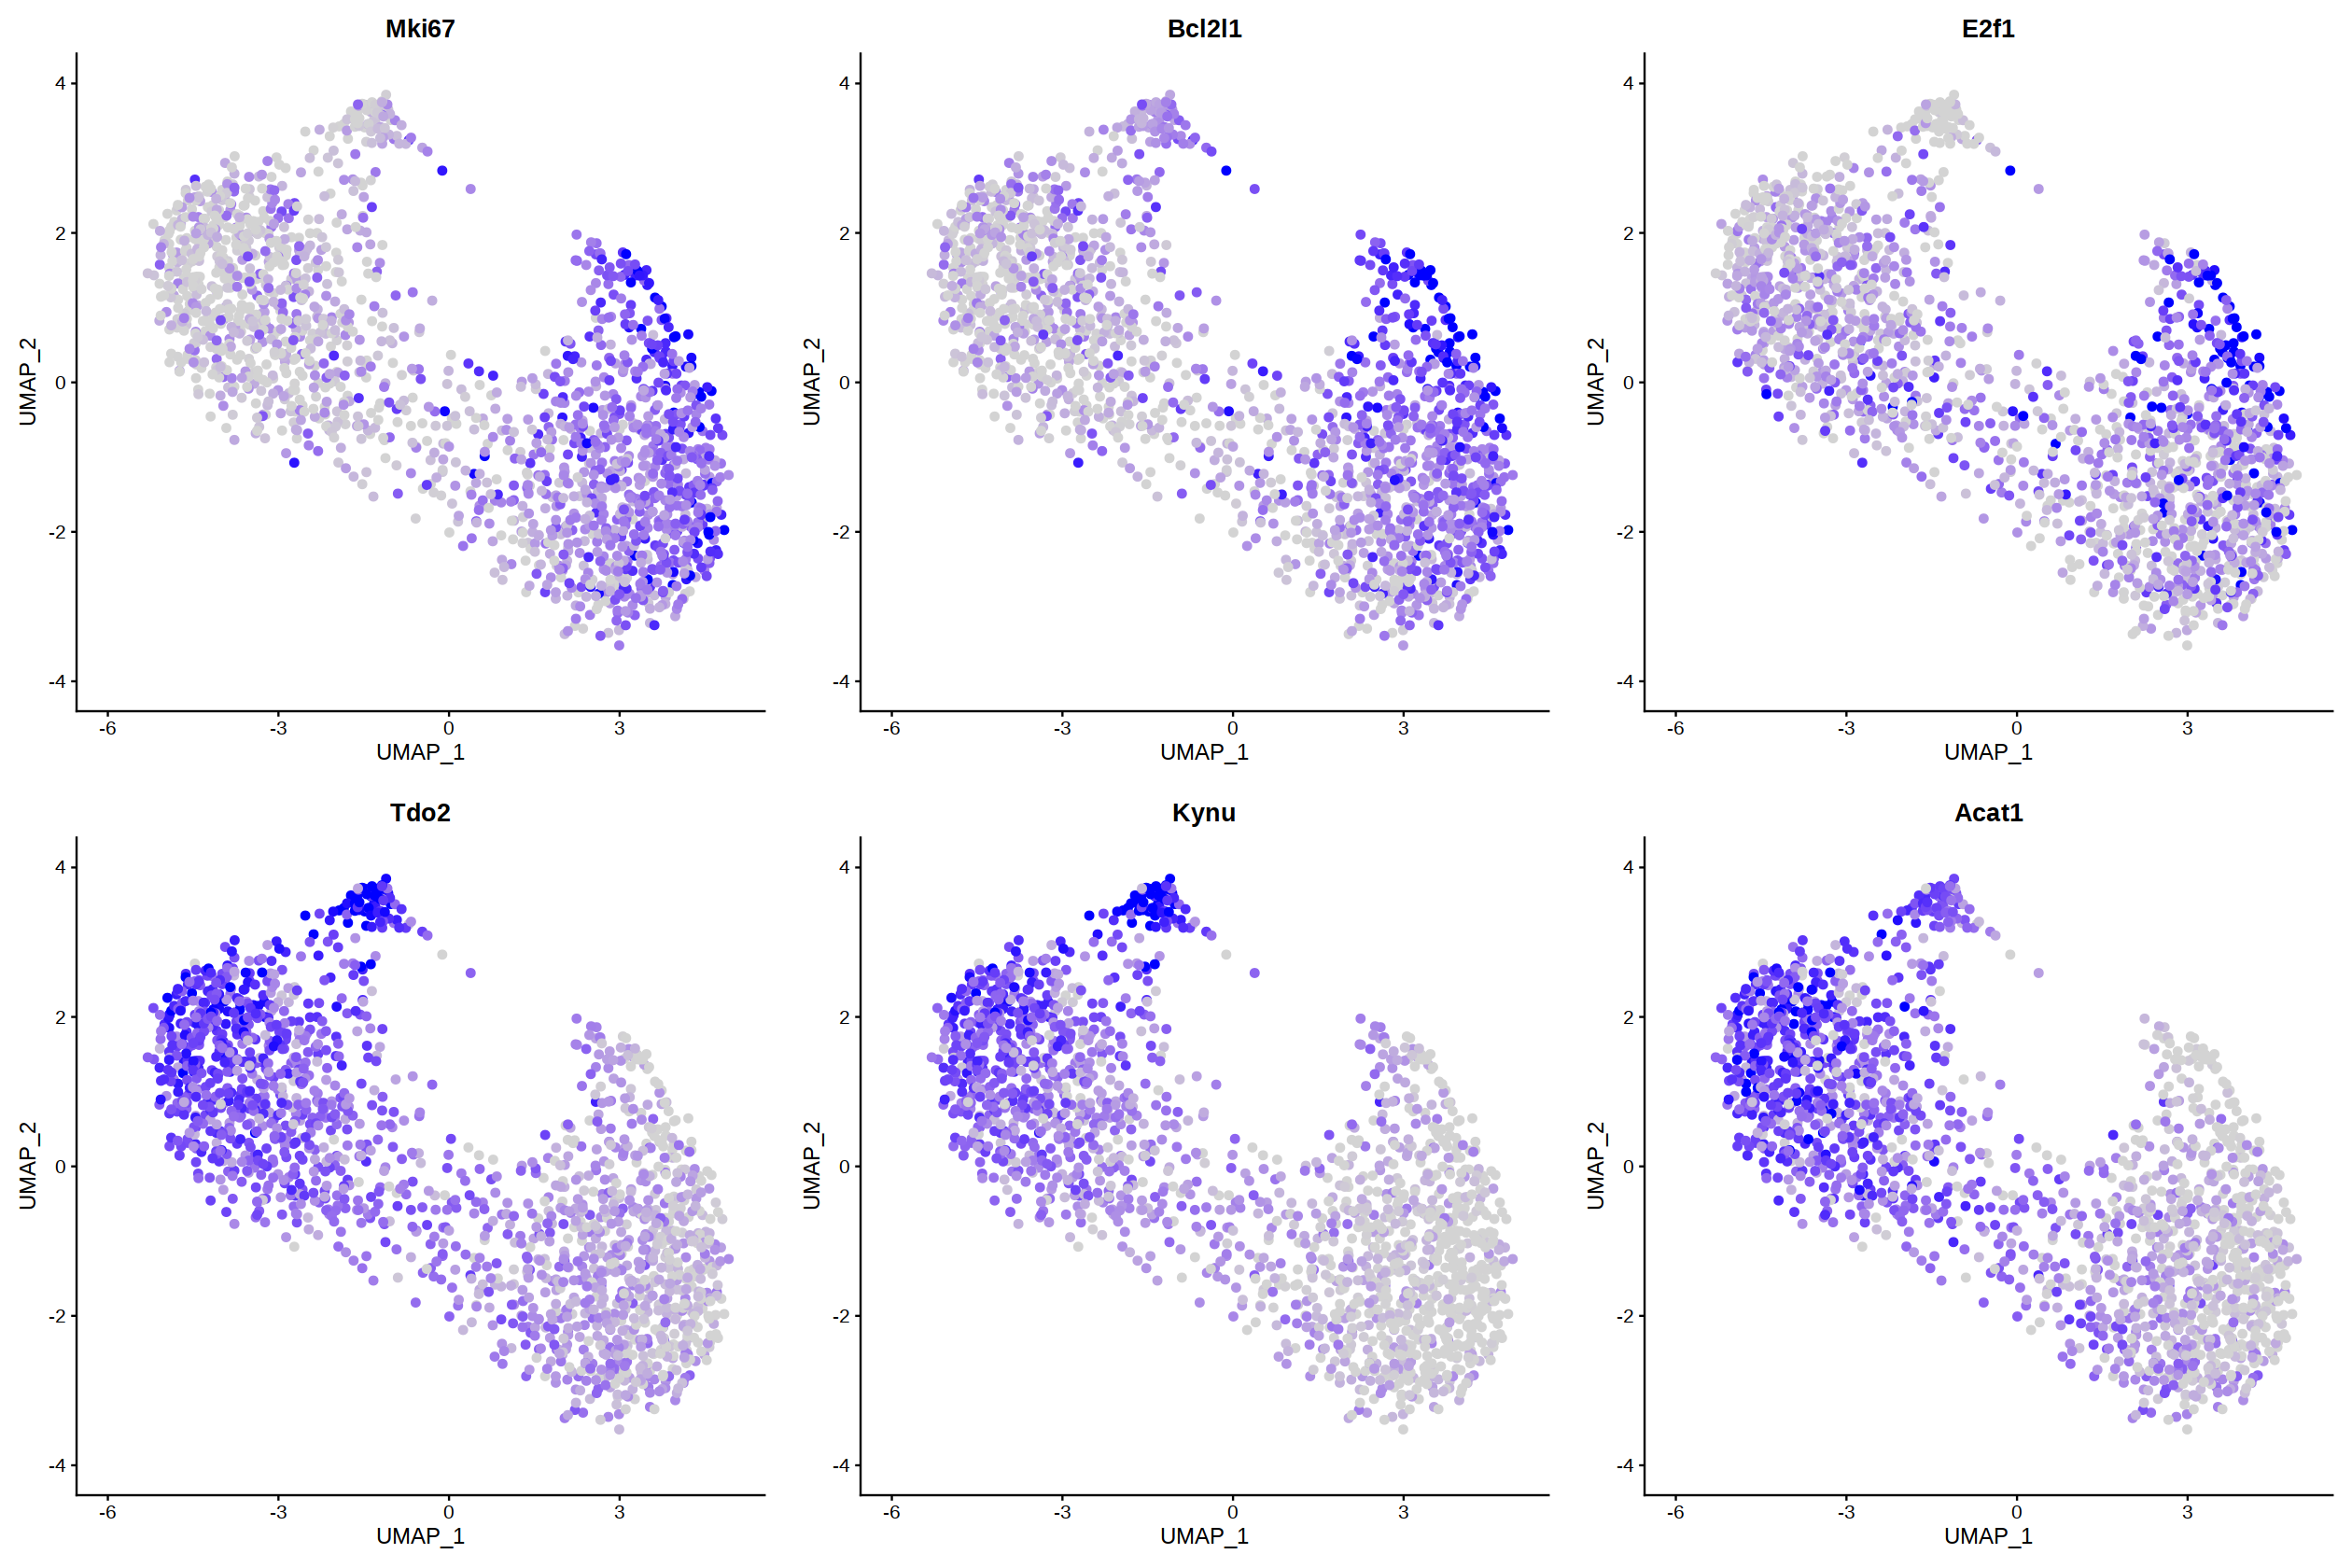

In [7]:
options(repr.plot.width=21, repr.plot.height=14)
DefaultAssay(obj) <- 'magic1'

p1 = FeaturePlot(obj, features='Mki67', pt.size=2, min.cutoff=0.022, max.cutoff=0.04)+ theme(legend.position = "none") 
p2 = FeaturePlot(obj, features='Bcl2l1', pt.size=2, min.cutoff=0.031, max.cutoff=0.034)+ theme(legend.position = "none")
p3 = FeaturePlot(obj, features='E2f1', pt.size=2, min.cutoff=0.00265, max.cutoff=0.0029) + theme(legend.position = "none")

p4 = FeaturePlot(obj, features='Tdo2', pt.size=2,  min.cutoff=0.009, max.cutoff=0.0115)+ theme(legend.position = "none") 
p5 = FeaturePlot(obj, features='Kynu', pt.size=2,  min.cutoff=0.375, max.cutoff=0.45)+ theme(legend.position = "none")
p6 = FeaturePlot(obj, features='Acat1', pt.size=2, min.cutoff=0.113, max.cutoff=0.125)+ theme(legend.position = "none")

plot_grid(p1, p2, p3, p4, p5, p6, ncol=3)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


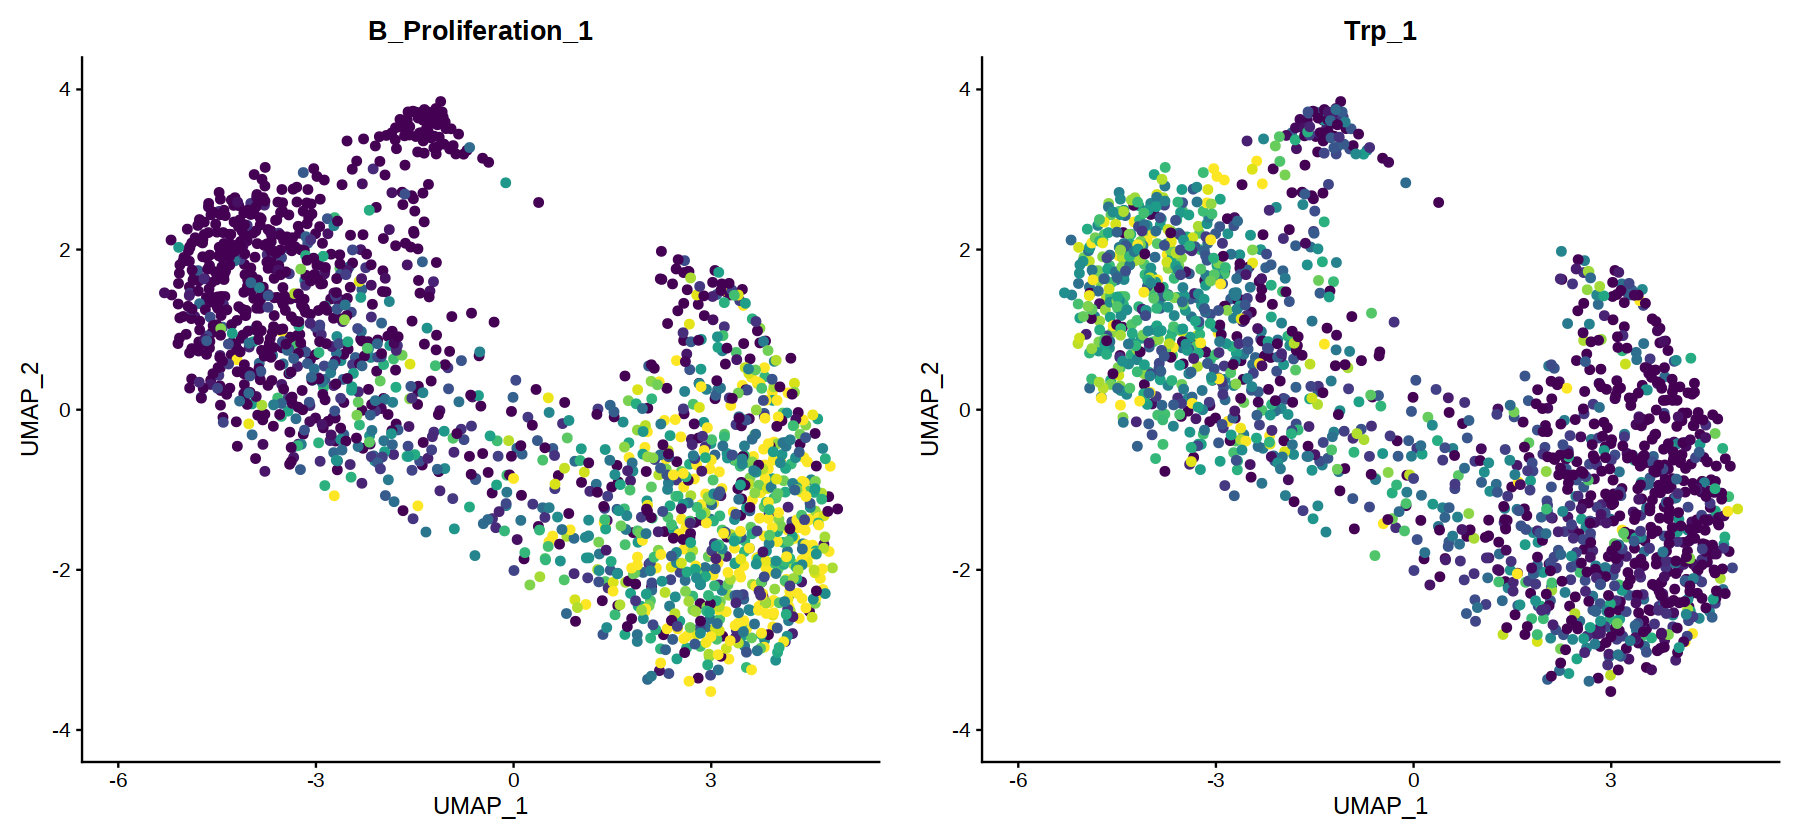

In [8]:
options(repr.plot.width=15, repr.plot.height=7)
p1 = FeaturePlot(obj, features='B_Proliferation_1', max.cutoff=0.8, min.cutoff=0.6, pt.size=2) + scale_colour_gradientn(colours = viridis::viridis(100)) + theme(legend.position = "none") 
p2 = FeaturePlot(obj, features='Trp_1', max.cutoff=0.8, min.cutoff=0.4, pt.size=2) + scale_colour_gradientn(colours = viridis::viridis(100))+ theme(legend.position = "none") 
plot_grid(p1, p2, ncol=2)